# NBA Player Data Analysis

## Predictions
1. I think that 3pt shooting % has trended upwards because teams are realizing how efficient they are (3pt revolution)
2. I think that the average player height has gone down (players don't have to rely on being tall and being able to dunk, they can shoot 3 pointers)
3. I think that 3pt% generally increases with 2pt%, but the players with the highest 2pt% have the worst 3pt% (since like 2012 maybe) (taller players, typically centers, have the best 2pt shooting percentage, but they can't shoot 3s because they don't have to rely on shooting)
4. I think that the average number of 3pt attempts/game has gone up since 1996 (3pt revolution)
6. I think that "Joe" is the most common first name.
7. I think that FT% increases with 3P%
7. I think that 3PT% decreases with weight
8. i think that the most common last name is smith
9. I think that 
10. I think that 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import sys
sys.path.insert(1, '../src')
from gen_logistic_regression import LogisticRegressor

In [2]:
players = pd.read_csv('./more-data/Players.csv')
all_seasons = pd.read_csv('./all_seasons.csv')
# players['height'] *= 0.393700787
# print(players.head)

<AxesSubplot:ylabel='Density'>

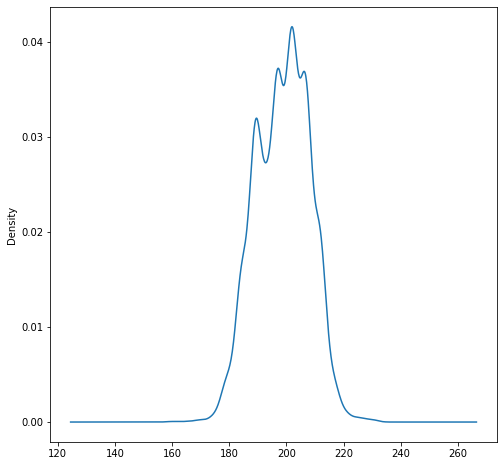

In [3]:
players["height"].plot(kind="density",
                        figsize=(8,8))
# height density graph of every player from 1960-2017

[]

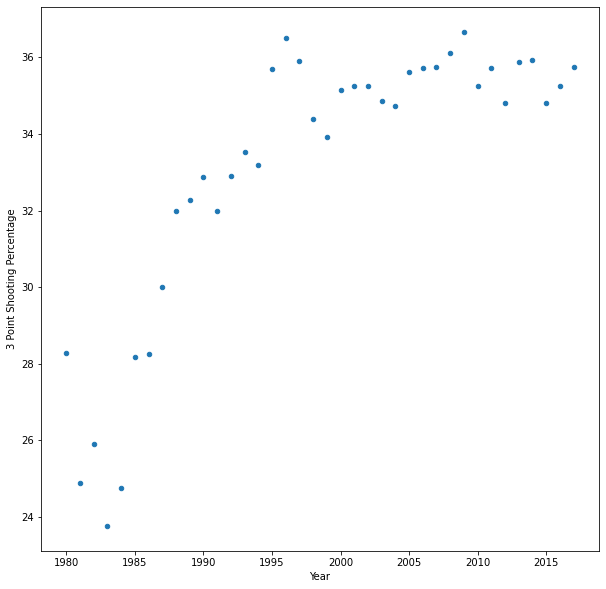

In [4]:
player_season_data = pd.read_csv('./more-data/Seasons_Stats.csv')
# player_season_data['height'] *= 0.393700787

all_years = player_season_data['Year'].unique()
years = [float(year) for year in all_years]

yearly_3p_percent = []

for year in all_years:
    avg_3p_percent = 100 * player_season_data[player_season_data['Year'] == year]['3P'].mean() / player_season_data[player_season_data['Year'] == year]['3PA'].mean()
    yearly_3p_percent.append(avg_3p_percent)


yearly_3p = pd.DataFrame({'year': all_years,
                            '3p%': yearly_3p_percent})

yearly_3p_percentage_plot = yearly_3p.plot(kind='scatter',
                x='year',
                y='3p%',
                xlabel='Year',
                ylabel="3 Point Shooting Percentage",
                figsize=(10, 10))

yearly_3p_percentage_plot.plot()

In [5]:
all_players = pd.read_csv('./more-data/Players.csv')
print(all_players['Player'].str.split(' ').str[0].value_counts())
# The most common name is John

John         75
Bob          68
Mike         59
Jim          58
Chris        47
             ..
Litterial     1
Shaquille     1
Latrell       1
Gundars       1
Ivica         1
Name: Player, Length: 1278, dtype: int64


<AxesSubplot:title={'center':'Freethrow Percentage vs 3 point percentage for every player season, with at least 200 3pt attempts and 200 ft attempts'}, xlabel='3P%', ylabel='FT%'>

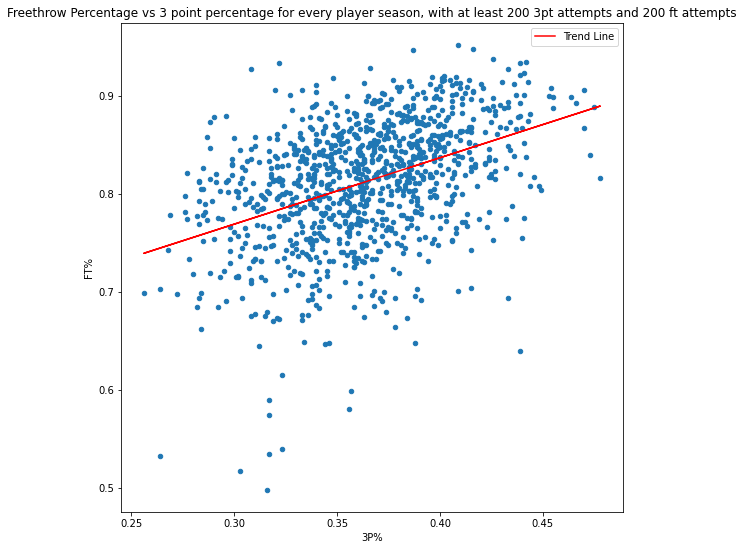

In [17]:
filter_player_season_data_for_3p_and_ft = player_season_data[(player_season_data['3PA'] > 200) & (player_season_data['FTA'] > 200)]
d = np.polyfit(filter_player_season_data_for_3p_and_ft['3P%'], filter_player_season_data_for_3p_and_ft['FT%'], 1)
f = np.poly1d(d)
filter_player_season_data_for_3p_and_ft.insert(
    53, 'Trend Line', f(filter_player_season_data_for_3p_and_ft['3P%']))

plot = filter_player_season_data_for_3p_and_ft.plot(
                                            kind='scatter',
                                            x='3P%',
                                            y='FT%',
                                            figsize=(9, 9),
                                            title='Freethrow Percentage vs 3 point percentage for every player season, with at least 200 3pt attempts and 200 ft attempts')

filter_player_season_data_for_3p_and_ft.plot(x='3P%', y='Trend Line', color='Red', ax=plot)

<AxesSubplot:xlabel='year', ylabel='3PA'>

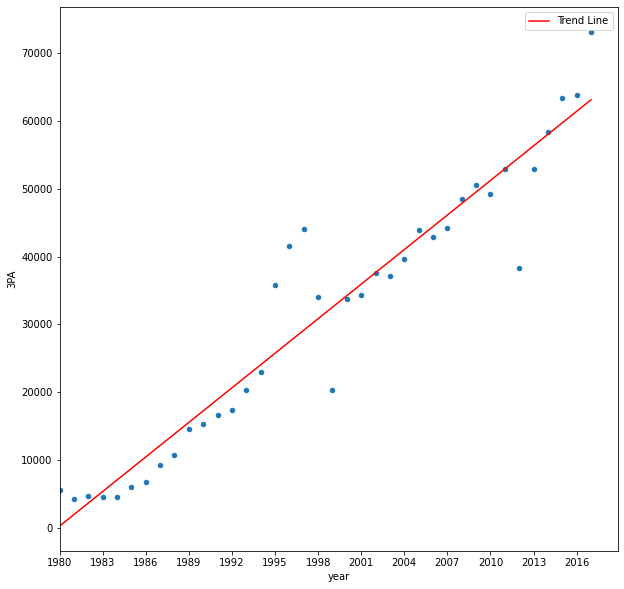

In [22]:
yearly_3pa = []
years = []

for year in all_years:
    if year >= 1980:
        tot_3pa = player_season_data[(player_season_data['Year'] == year) & (player_season_data['3PA'] > 0)]['3PA'].sum()
        yearly_3pa.append(tot_3pa)
        years.append(year)

yearly_3pa_and_year = pd.DataFrame({'year': years,
                                '3PA': yearly_3pa})

e = np.polyfit(
    yearly_3pa_and_year['year'], yearly_3pa_and_year['3PA'], 1)
f = np.poly1d(e)

yearly_3pa_and_year.insert(2, 'Trend Line', f(yearly_3pa_and_year['year']))

plot = yearly_3pa_and_year.plot(kind='scatter',
                        x='year',
                        y='3PA',
                        xlim=1980,
                        figsize=(10, 10),
                        xticks=years[::3])

yearly_3pa_and_year.plot(x='year', y='Trend Line', color='Red', ax=plot)

In [8]:
all_seasons['season'].str.split('-')[0]

['1996', '97']